In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore
from scipy.stats import boxcox

__Loading datasets

In [5]:
df=pd.read_csv("E:\\census_income.csv")
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

the features age,fpenlwgt,capital loss,capital gain,hours per week are integer type remaining all are object type

In [105]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [106]:
df.shape

(32560, 15)

In [107]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values

In [ ]:
checking for unique values to identify whether it has any unnamed valued like ?

In [29]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [107]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [109]:
((32560-31014)/32560)*100

4.7481572481572485

In [110]:
100-4.7481572481572485

95.25184275184276

95% value falls to same category 0 so it wont create impact on target column income

In [108]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [111]:
((32560-29849)/32560)*100

8.326167076167076

In [112]:
100-8.326167076167076

91.67383292383292

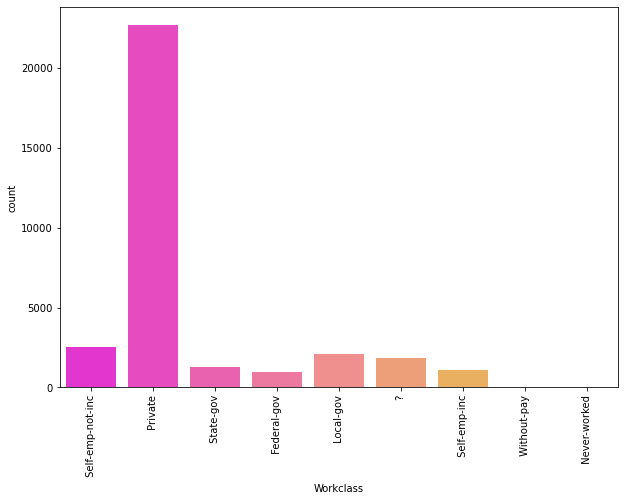

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Workclass'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

data is missing in workclass feature.we need to fill it with mode as its catagorical column

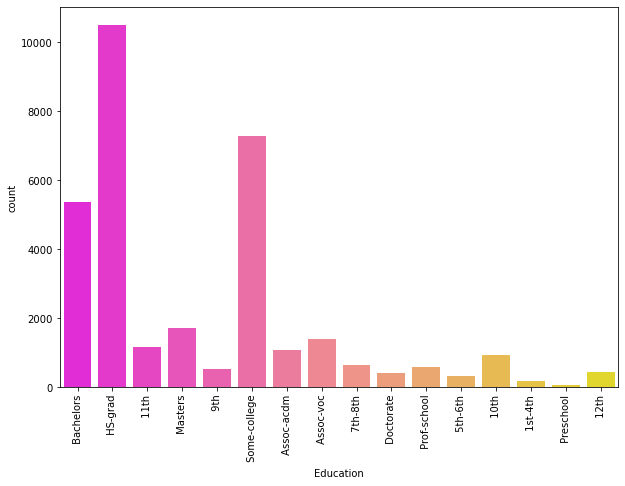

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Education'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

citizens with hs-grad is higher

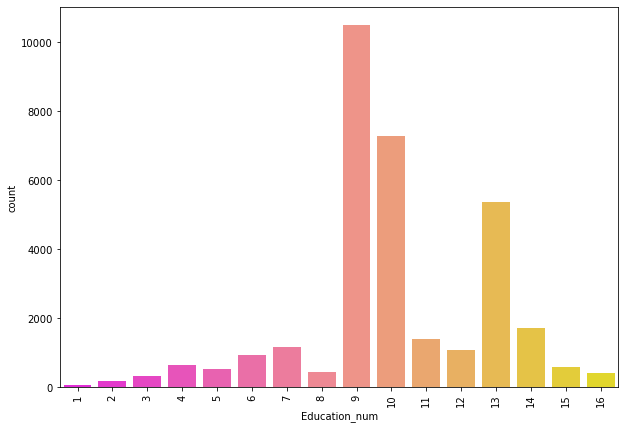

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Education_num'],data=df,palette="spring")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

more population with higher education 9

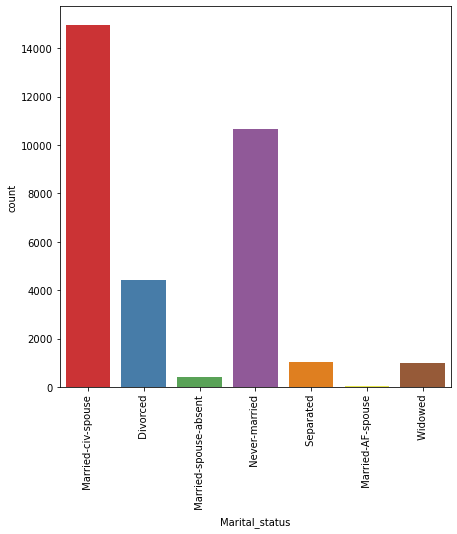

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['Marital_status'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

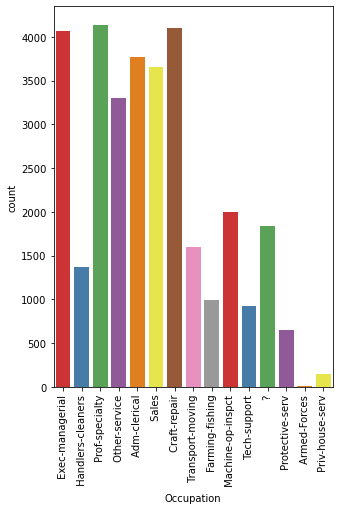

In [21]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Occupation'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

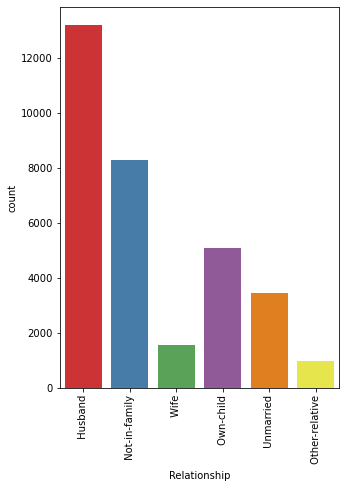

In [22]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Relationship'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

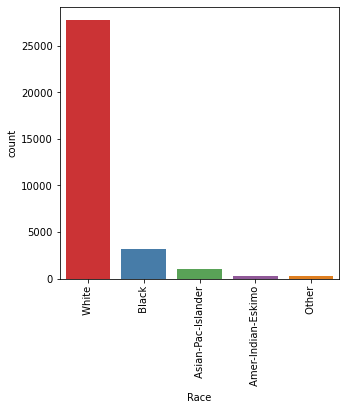

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Race'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

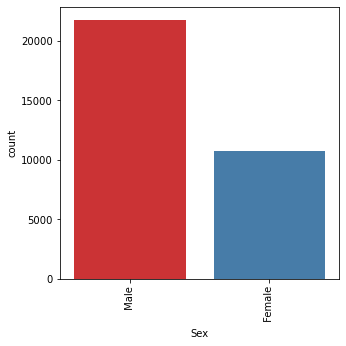

In [73]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Sex'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

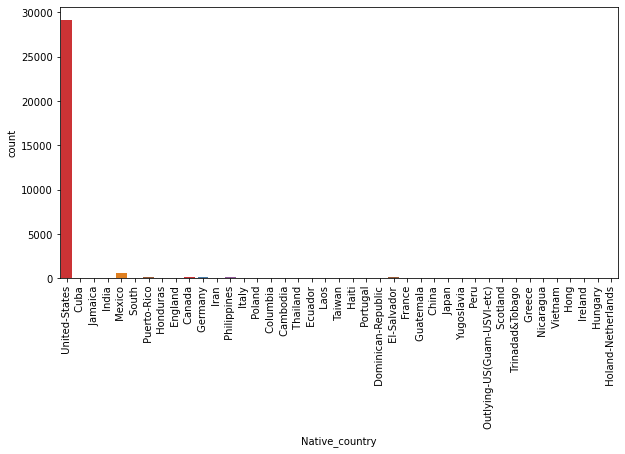

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Native_country'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

Native country feature also has ? (missing value).most of the data is about people in united states

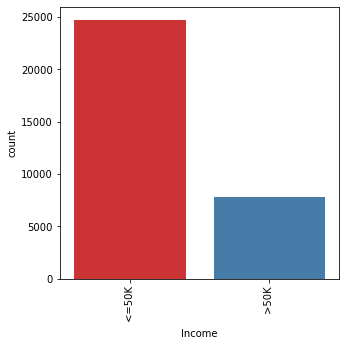

In [77]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Income'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

Majority of people having less than or equal 50000 income

In [30]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [62]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df.loc[df['Workclass']==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
df_new=df
df_new['Workclass']=df['Workclass'].replace(" ?",np.nan)

In [16]:
df_new['Occupation']=df['Occupation'].replace(" ?",np.nan)

In [17]:
df_new['Native_country']=df['Native_country'].replace(" ?",np.nan)

In [18]:
df_new.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

___Handling missing value

In [19]:
df_mod=df_new.fillna(df_new.mode().iloc[0])

In [20]:
df_mod.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

___BI VARIATE ANALYSIS

Text(0.4, 1, 'Distribution of income with age:')

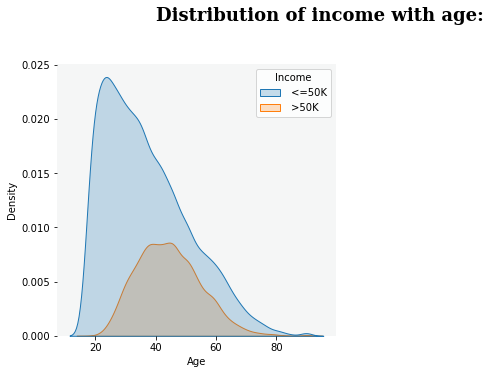

In [23]:
fig=plt.figure(figsize=(5,5))
ax=sns.kdeplot(x=df["Age"],hue=df["Income"],fill=True)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
fig.text(0.4,1,"Distribution of income with age:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)


from the above figure it is evident that adult or age below 20 has less then 50,000 income

Text(0.4, 1, 'Distribution of income with final weight')

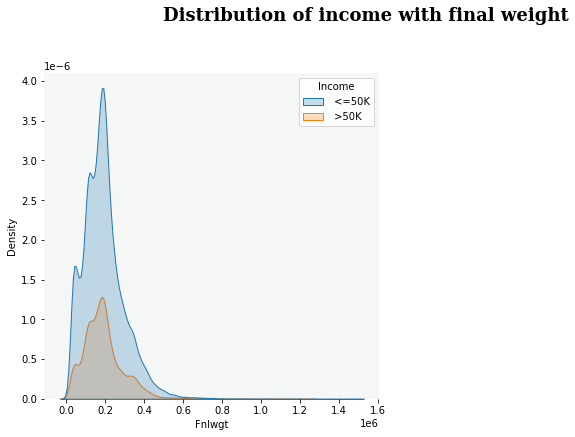

In [11]:
fig=plt.figure(figsize=(6,6))
ax=sns.kdeplot(x=df["Fnlwgt"],hue=df["Income"],fill=True)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
fig.text(0.4,1,"Distribution of income with final weight",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)

from the above figure it is evident that adult or age below 20 has less then 50,000 income

Text(0.4, 1, 'Distribution of income with Occupation:')

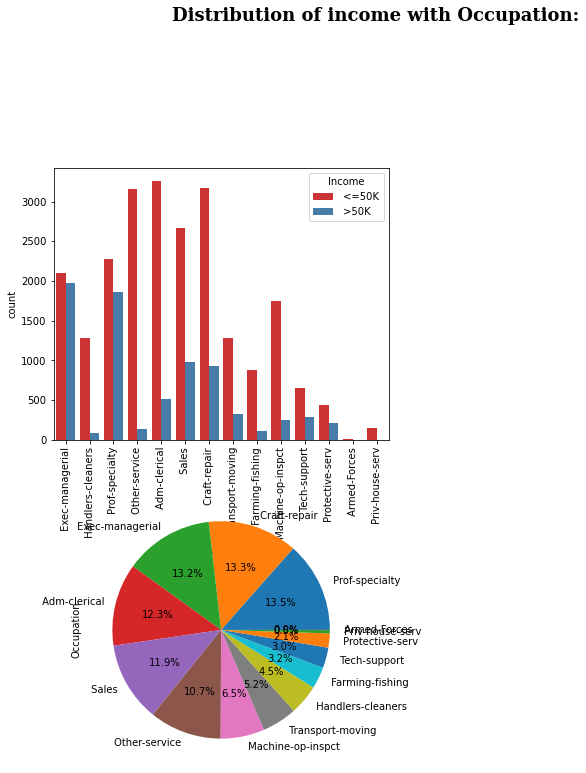

In [27]:
fig=plt.figure(figsize=(6,17))
rows = 3
cols = 1
i=0
color_l=['brown','blue','salmon','purple','pink','orange','salmon','red','grey','cyan']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Occupation'].unique())
sns.countplot(df_new['Occupation'],palette="Set1",hue=df_new.Income)
plt.xticks(rotation=90)
i+=1
plt.subplot(rows,cols,i)
df_new['Occupation'].value_counts().plot.pie(autopct='%1.1f%%')
fig.text(0.4,1,"Distribution of income with Occupation:",{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)

Most of them are belongs to prof-speciality category.most of the prof_speciality people getting income higher than 50,000.
Most of the adm-clerical get highest salary

Text(0.4, 1, 'Distribution of income with RACE:')

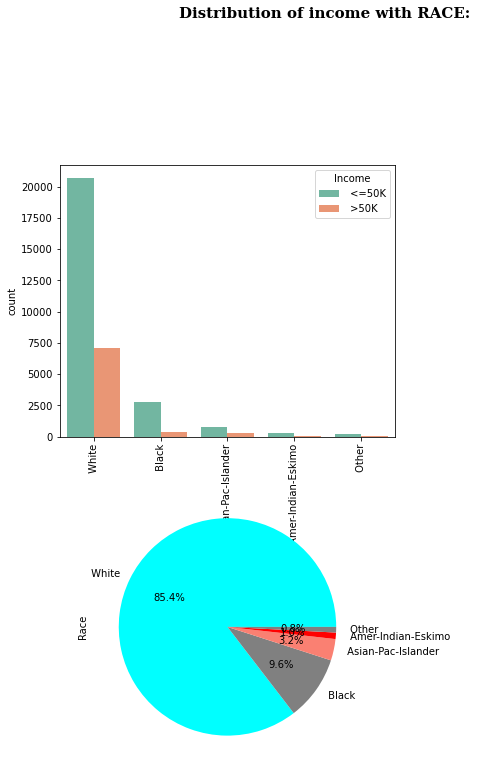

In [29]:
fig=plt.figure(figsize=(6,17))
rows = 3
cols = 1
i=0
color_l=['cyan','grey','salmon','red','grey','pink']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Race'].unique())
sns.countplot(df_new['Race'],palette="Set2",hue=df_new.Income)
plt.xticks(rotation=90)
i+=1
plt.subplot(rows,cols,i)
df_new['Race'].value_counts().plot.pie(autopct='%1.1f%%',colors=color_l)
fig.text(0.4,1,"Distribution of income with RACE:",{'font':'serif', 'size':15,'weight':'bold'}, alpha = 1)

most of white earning less than 50000 and the majority race is white

Text(0.4, 1, 'Distribution of income with Native:')

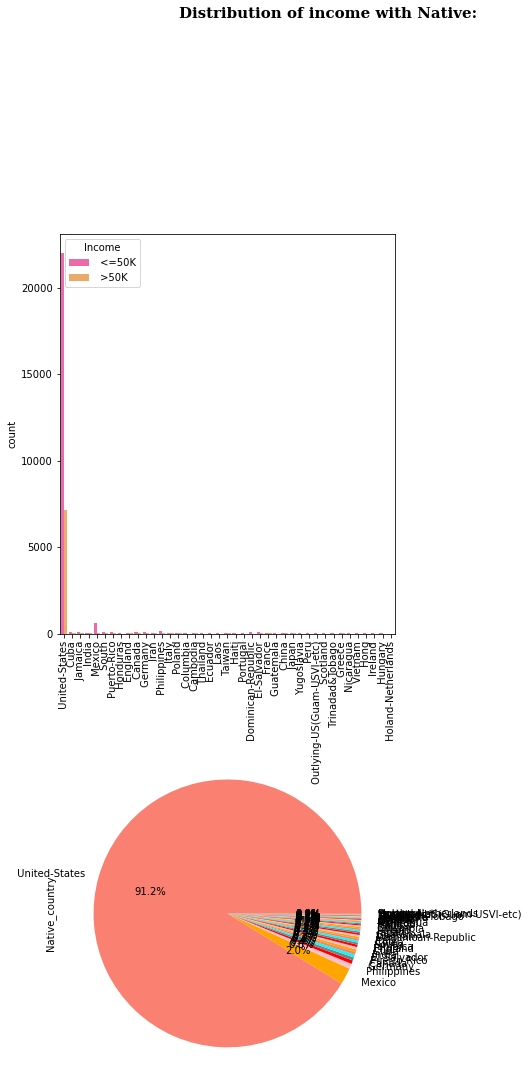

In [33]:
fig=plt.figure(figsize=(6,25))
rows = 3
cols = 1
i=0
color_l=['salmon','orange','pink','red','grey','cyan']
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['Native_country'].unique())
sns.countplot(df_new['Native_country'],palette="spring",hue=df_new.Income)
plt.xticks(rotation=90)
i+=1
plt.subplot(rows,cols,i)
df_new['Native_country'].value_counts().plot.pie(autopct='%1.1f%%',colors=color_l)
fig.text(0.4,1,"Distribution of income with Native:",{'font':'serif', 'size':15,'weight':'bold'}, alpha = 1)

91.2% percentage of population belongs to unitedstates and majority of people earning more than 50000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

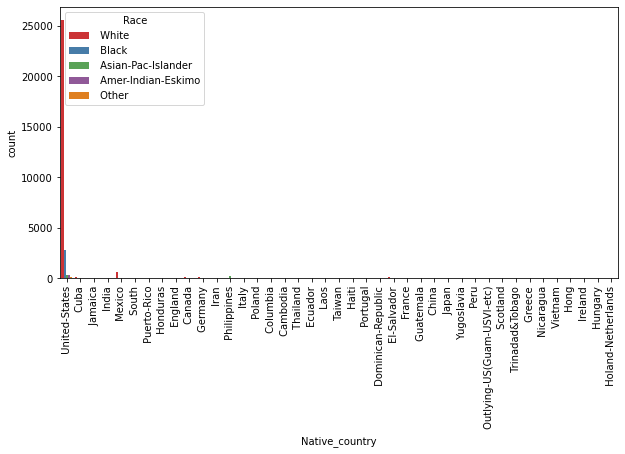

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(df_new['Native_country'],palette="Set1",hue=df_new.Race)
plt.xticks(rotation=90)

except age and fnlwgt all are categorical column

In [35]:
data_clean=df_mod
col_encod=['Workclass', 'Education', 'Education_num',
       'Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [36]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_clean[col]= label.fit_transform(df_mod[col])

In [37]:
data_clean.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,12,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,8,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,6,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,12,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,13,2,3,5,4,0,0,0,40,38,0


<AxesSubplot:>

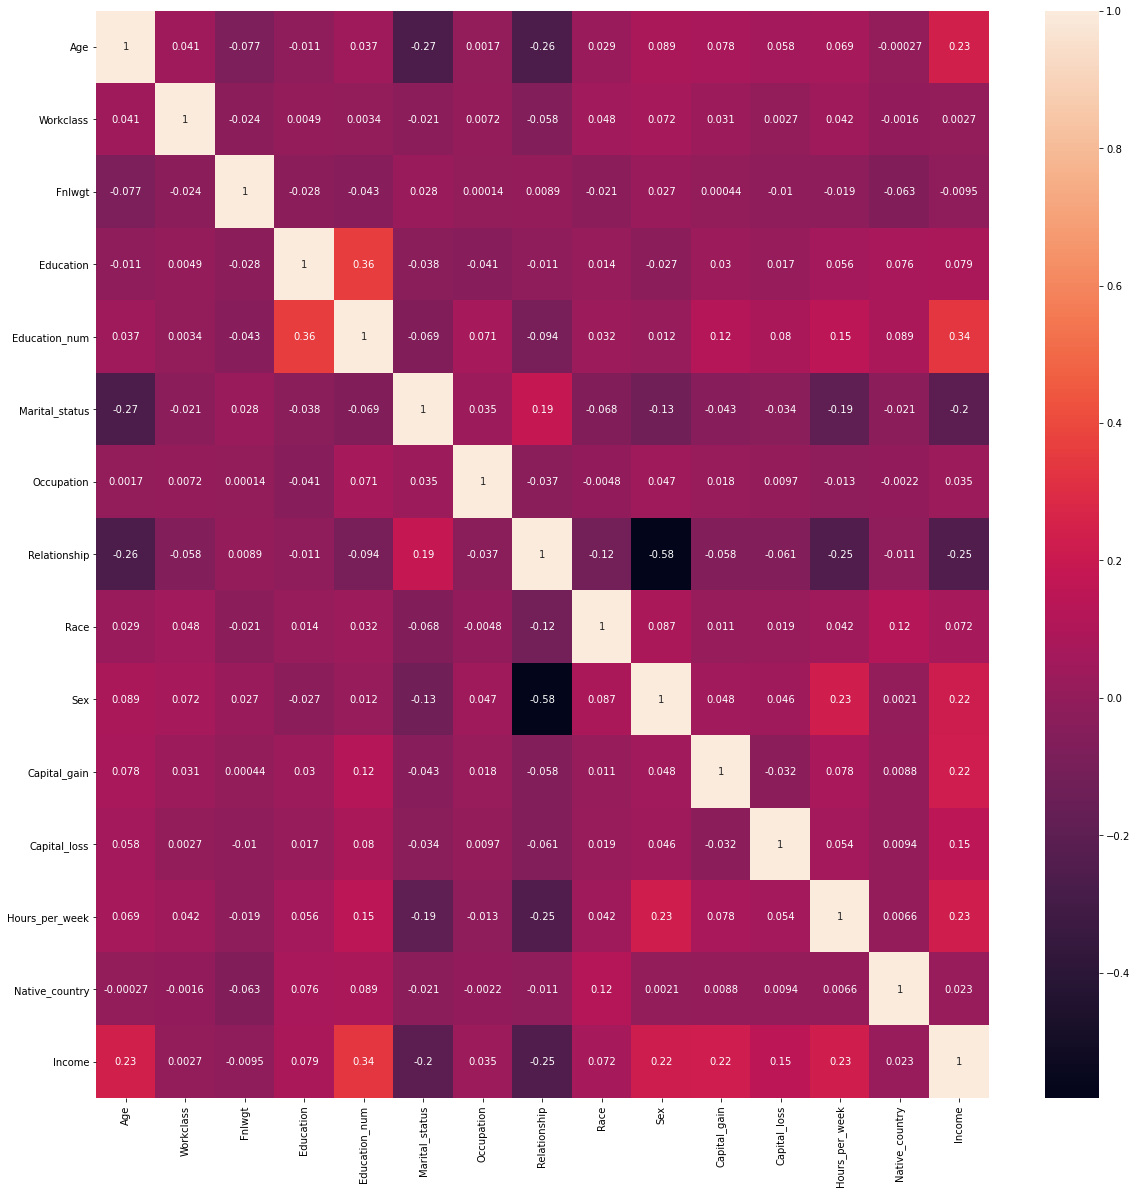

In [44]:
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

fnlwgt is least corelated with income.Education number is highly correlated with Income.so I'm going to drop fnlwgt feature

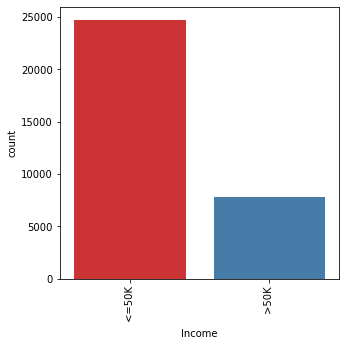

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Income'],data=df,palette="Set1")
plt.xticks(rotation=90)
plt.grid=True
plt.show()

___Handling Imbalance in target column

In [40]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()

splitting x and y and also remvoing Fnlwgt because it has slight correlation withtarget

In [41]:
colu=['Income']

In [42]:
x1=data_clean.drop(colu,axis=1)
y1=data_clean['Income']

In [43]:
x1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [312]:
x1,y1=os.fit_resample(x1,y1)

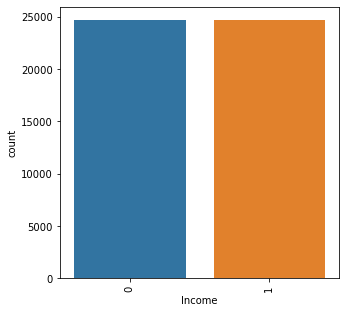

In [313]:
plt.figure(figsize=(5,5))
sns.countplot(x=y1)
plt.xticks(rotation=90)
plt.show()

SCALING

In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [315]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [316]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [317]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.7713592233009708 

"Confusion Matrix:
" [[4703 1567]
 [1259 4831]]
classification_report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      6270
           1       0.76      0.79      0.77      6090

    accuracy                           0.77     12360
   macro avg       0.77      0.77      0.77     12360
weighted avg       0.77      0.77      0.77     12360

Average accuracy_score 0.7713592233009708
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8937702265372168 

"Confusion Matrix:
" [[5628  642]
 [ 671 5419]]
classification_report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      6270
           1       0.89      0.89      0.89      6090

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.

___CROSS VALIDATION

In [318]:
x=scaled
y=y1
scorel=[]

In [319]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.77730583, 0.85649272, 0.92708333, 0.9307171 , 0.9307171 ])

In [320]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.77406958, 0.85618932, 0.92647654, 0.93061596, 0.9293011 ])

In [321]:
bg=BaggingClassifier()
scores=cross_val_score(bg,x,y,cv=5)
scorel.append(scores)
scores

array([0.75798948, 0.8384911 , 0.92192557, 0.92515424, 0.92323253])

In [322]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.74959547, 0.8233212 , 0.87944984, 0.8828765 , 0.88277536])

In [323]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.78013754, 0.85315534, 0.90291262, 0.90340852, 0.90735309])

In [324]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.74726942, 0.81614078, 0.88764159, 0.89268737, 0.88854051])

DIFFERENCE

In [325]:
models=[LogisticRegression(),RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,6):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [0.0059466  0.0851335  0.15572411 0.15935788 0.15935788]
RandomForestClassifier() difference is [-0.11970065 -0.03758091  0.03270631  0.03684573  0.03553088]
BaggingClassifier() difference is [-0.12526294 -0.04476133  0.03867314  0.04190182  0.0399801 ]
KNeighborsClassifier() difference is [-0.09563107 -0.02190534  0.0342233   0.03764997  0.03754882]
GradientBoostingClassifier() difference is [-0.09728964 -0.02427184  0.02548544  0.02598133  0.02992591]
DecisionTreeClassifier() difference is [-0.10750405 -0.03863269  0.03286812  0.0379139   0.03376704]


GradientBoostingClassifier() has least difference

Finding best parameter using hyper tuning

In [326]:
x=scaled
y=y1
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [292]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'loss':["deviance"],'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],'min_samples_split': [5, 10],'max_features':["log2","sqrt"], "n_estimators":[10,100]}

gs2 = GridSearchCV(GradientBoostingClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
Best param: {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


___Modelling using best parameters

In [293]:
x=scaled
y=y1

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25,random_state=1)

In [327]:

model =GradientBoostingClassifier(learning_rate=0.2,loss='deviance',max_depth=8,max_features='sqrt',min_samples_split=5,n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8864077669902912

In [328]:
y_pred_1 = model.predict(x_test)

In [329]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",round(result2,2))

Confusion Matrix:
[[5417  853]
 [ 551 5539]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      6270
           1       0.87      0.91      0.89      6090

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360

Accuracy: 0.89


In [ ]:
___Saving the model

In [332]:
from joblib import dump
dump(model, 'census.joblib')

['census.joblib']

In [333]:
from joblib import load
loaded = load('census.joblib')